In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import pickle
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [ ]:
rest_data = pd.read_csv('/content/drive/MyDrive/Harman_Project/Dataset/zomato.csv')
rest_data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [ ]:
rest_data.shape

(51717, 17)

In [ ]:
rest_data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
rest_data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [ ]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
rest_data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [ ]:
rest_data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# **Cleaning Data**

In [ ]:
rest_data['menu_item'].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [ ]:
print(rest_data['reviews_list'].shape)

(51717,)


In [ ]:
rest_data['reviews_list'].unique()

array(['[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said th

In [ ]:
rest_data = rest_data.drop(['url', 'address', 'phone', 'menu_item', 'reviews_list', 'listed_in(city)'], axis = 1)  # dropping irrelevant features
rest_data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars


In [ ]:
rest_data.drop_duplicates(inplace = True)  # drop duplicate data
rest_data.shape

(35109, 11)

In [ ]:
rest_data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
def split_rating(value):                  # cleaning rate column
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
rest_data['rate'] = rest_data['rate'].apply(split_rating)

In [ ]:
rest_data['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
rest_data['rate'].fillna(rest_data['rate'].median(), inplace = True)  # filling null values of rate column
rest_data['rate'].isnull().sum()

0

In [ ]:
rest_data.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                          14
rest_type                        156
dish_liked                     17007
cuisines                          33
approx_cost(for two people)      221
listed_in(type)                    0
dtype: int64

In [ ]:
rest_data.dropna(inplace = True)  # dropping null values
rest_data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [ ]:
rest_data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [ ]:
def remove_comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    
rest_data['approx_cost(for two people)'] = rest_data['approx_cost(for two people)'].apply(remove_comma)

In [ ]:
rest_data['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [ ]:
rest_data['rest_type'].value_counts()

Casual Dining                5642
Quick Bites                  3806
Cafe                         1812
Casual Dining, Bar            852
Dessert Parlor                785
                             ... 
Bar, Pub                        5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: rest_type, Length: 73, dtype: int64

In [ ]:
rest_data['location'].value_counts()

Koramangala 5th Block    1335
Indiranagar              1237
BTM                       947
HSR                       928
Whitefield                826
                         ... 
West Bangalore              2
Yelahanka                   2
Magadi Road                 2
North Bangalore             1
KR Puram                    1
Name: location, Length: 88, dtype: int64

In [ ]:
rest_data['cuisines'].value_counts()

North Indian                            890
North Indian, Chinese                   581
South Indian                            277
Cafe                                    203
Bakery, Desserts                        171
                                       ... 
Cafe, Italian, Continental, European      1
American, Continental, Chinese            1
Sandwich, Pizza, Salad                    1
Seafood, Fast Food                        1
Thai, Chinese, Momos                      1
Name: cuisines, Length: 1691, dtype: int64

In [ ]:
rest_data['online_order'] = rest_data['online_order'].map({'Yes': 'Online', 'No': 'Offline'})
rest_data['book_table'] = rest_data['book_table'].map({'Yes': 'booking_available', 'No': 'booking_not_available'})

# **EDA**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc82796ed10>,
      dtype=object)

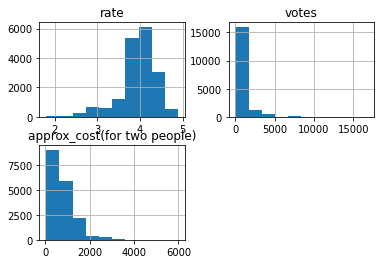

In [ ]:
# histogram plots
rest_data.hist()

In [ ]:
'''# outliers
plt.subplots(1,3)
numerical_features = [x for x in rest_data.columns if rest_data[x].dtype != 'O']
for col in numerical_features:
    plt.figure(figsize = (6,6))
    sns.boxplot(x=col, data=rest_data)
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.show()'''

"# outliers\nplt.subplots(1,3)\nnumerical_features = [x for x in rest_data.columns if rest_data[x].dtype != 'O']\nfor col in numerical_features:\n    plt.figure(figsize = (6,6))\n    sns.boxplot(x=col, data=rest_data)\n    plt.xlabel(col)\n    plt.ylabel('Value')\n    plt.show()"

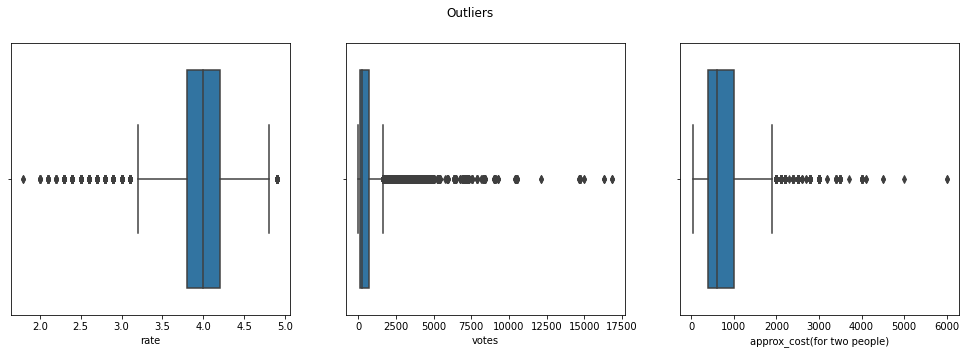

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5), sharey=True)
fig.suptitle('Outliers')
numerical_features = [x for x in rest_data.columns if rest_data[x].dtype != 'O']
ax=0
for col in numerical_features:
    sns.boxplot(ax=axes[ax], x=col, data=rest_data)
    ax+=1
#plt.savefig('/content/drive/MyDrive/Harman_Project/EDA_Plots/Outliers.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


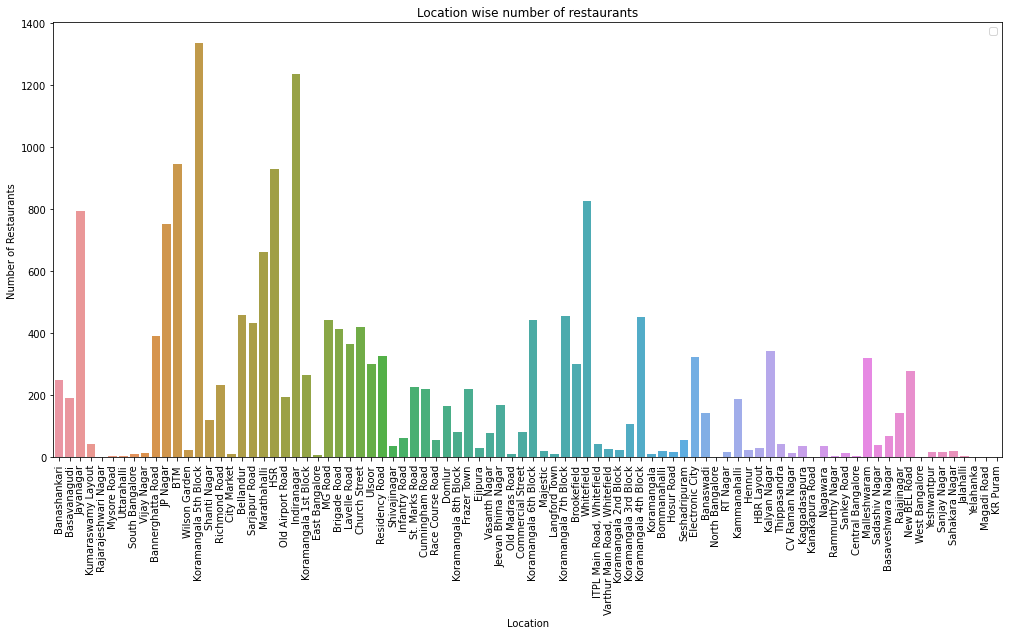

In [ ]:
# number of restaurants in every location
plt.figure(figsize = (17,8))
ax = sns.countplot(rest_data['location'])
plt.xticks(rotation=90)
plt.title('Location wise number of restaurants')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Harman_Project/EDA_Plots/Location_wise_number_of_restaurants.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


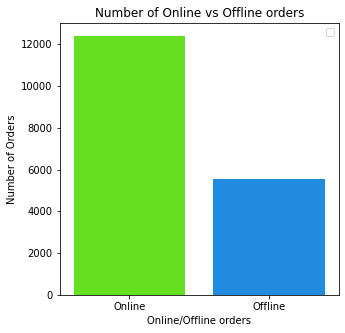

In [ ]:
# Number of online and offline orders
plt.figure(figsize = (5,5))
sns.countplot(rest_data['online_order'], palette = 'gist_rainbow')
plt.title('Number of Online vs Offline orders')
plt.xlabel('Online/Offline orders')
plt.ylabel('Number of Orders')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Harman_Project/EDA_Plots/Number_of_Online_vs_Offline_orders.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


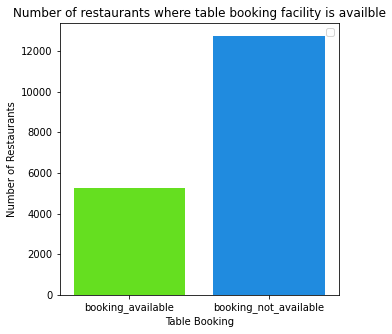

In [ ]:
# Number of table bookings
plt.figure(figsize = (5,5))
sns.countplot(rest_data['book_table'], palette = 'gist_rainbow')
plt.title('Number of restaurants where table booking facility is availble')
plt.xlabel('Table Booking')
plt.ylabel('Number of Restaurants')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Harman_Project/EDA_Plots/Number_of_restaurants_where_table_booking_facility_is_availble.png')

No handles with labels found to put in legend.


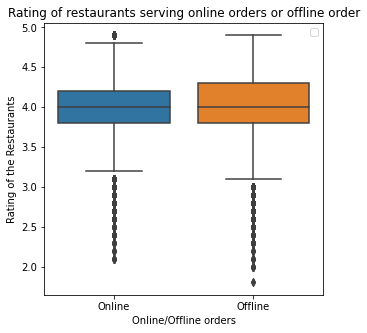

In [ ]:
# Rating of restaurants serving online orders and offline order
plt.figure(figsize = (5,5))
sns.boxplot(x = 'online_order', y = 'rate', data = rest_data)
plt.title('Rating of restaurants serving online orders or offline order')
plt.xlabel('Online/Offline orders')
plt.ylabel('Rating of the Restaurants')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Harman_Project/EDA_Plots/Rating_of_restaurants_serving_online_orders_or_offline_order.png')

No handles with labels found to put in legend.


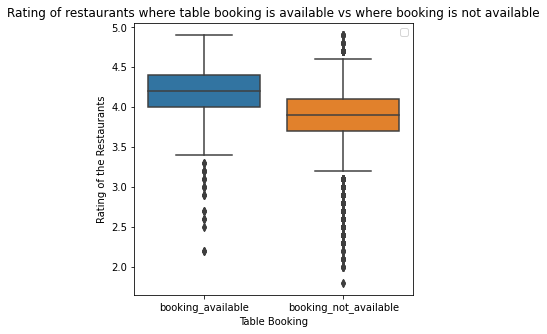

In [ ]:
# ratings of restaurants providing pre-booking facilities
plt.figure(figsize = (5,5))
sns.boxplot(x = 'book_table', y = 'rate', data = rest_data)
plt.title('Rating of restaurants where table booking is available vs where booking is not available')
plt.xlabel('Table Booking')
plt.ylabel('Rating of the Restaurants')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Harman_Project/EDA_Plots/Rating_of_restaurants_where_table_booking_is_available_vs_where_booking_is_not_available.png')

No handles with labels found to put in legend.


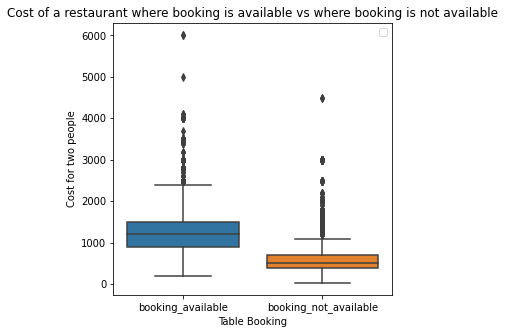

In [ ]:
# cost of 2 people for booking table

plt.figure(figsize = (5,5))
sns.boxplot(x = 'book_table', y = 'approx_cost(for two people)', data = rest_data)
plt.title('Cost of a restaurant where booking is available vs where booking is not available')
plt.xlabel('Table Booking')
plt.ylabel('Cost for two people')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Harman_Project/EDA_Plots/Cost_of_a_restaurant_where_booking_is_available_vs_where_booking_is_not_available.png')

No handles with labels found to put in legend.


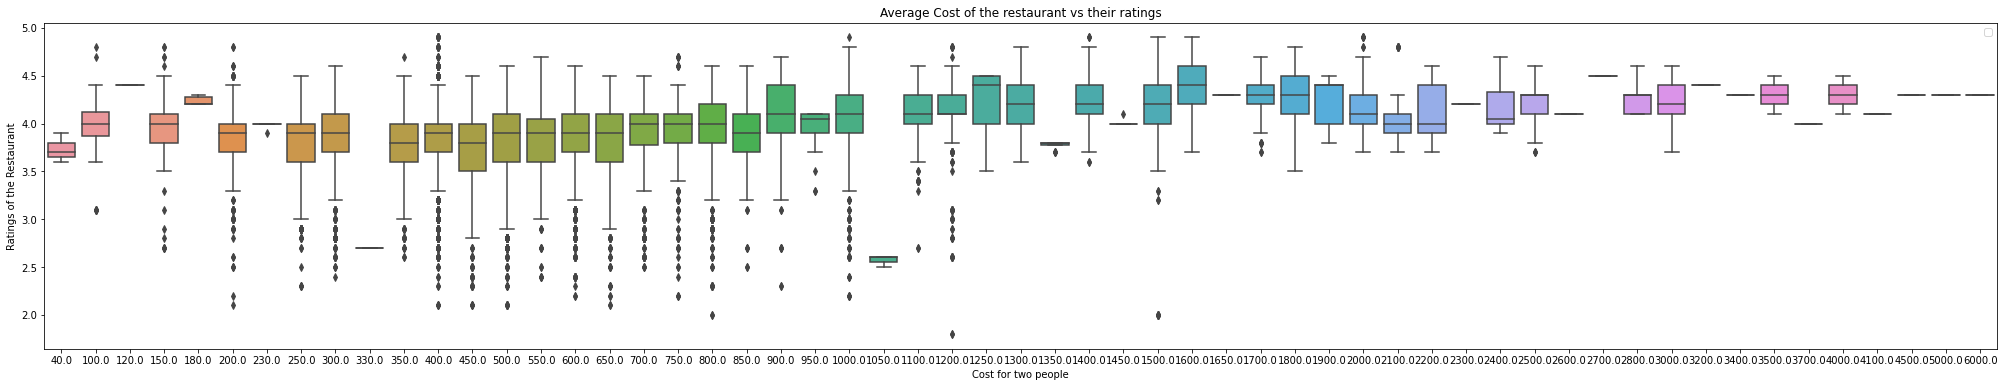

In [ ]:
# figure out does costly restraunts also have higher ratings

plt.figure(figsize = (35,6))
sns.boxplot(x = 'approx_cost(for two people)', y = 'rate', data = rest_data)
plt.title('Average Cost of the restaurant vs their ratings')
plt.xlabel('Cost for two people')
plt.ylabel('Ratings of the Restaurant')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Harman_Project/EDA_Plots/Average_Cost_of_the_restaurant_vs_their_ratings.png')

In [ ]:
# location wise online orders
df_loc_onlineord = pd.DataFrame(rest_data.groupby(['location','online_order'])['name'].count())
df_loc_onlineord = pd.pivot_table(df_loc_onlineord, index=['location'], columns=['online_order'])
df_loc_onlineord

name       
online_order      Offline Online
location                        
BTM                 177.0  770.0
Banashankari         67.0  183.0
Banaswadi            34.0  109.0
Bannerghatta Road    84.0  308.0
Basavanagudi         59.0  132.0
...                   ...    ...
West Bangalore        NaN    2.0
Whitefield          265.0  561.0
Wilson Garden         7.0   15.0
Yelahanka             NaN    2.0
Yeshwantpur           1.0   16.0

[88 rows x 2 columns]

In [ ]:
rest_data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

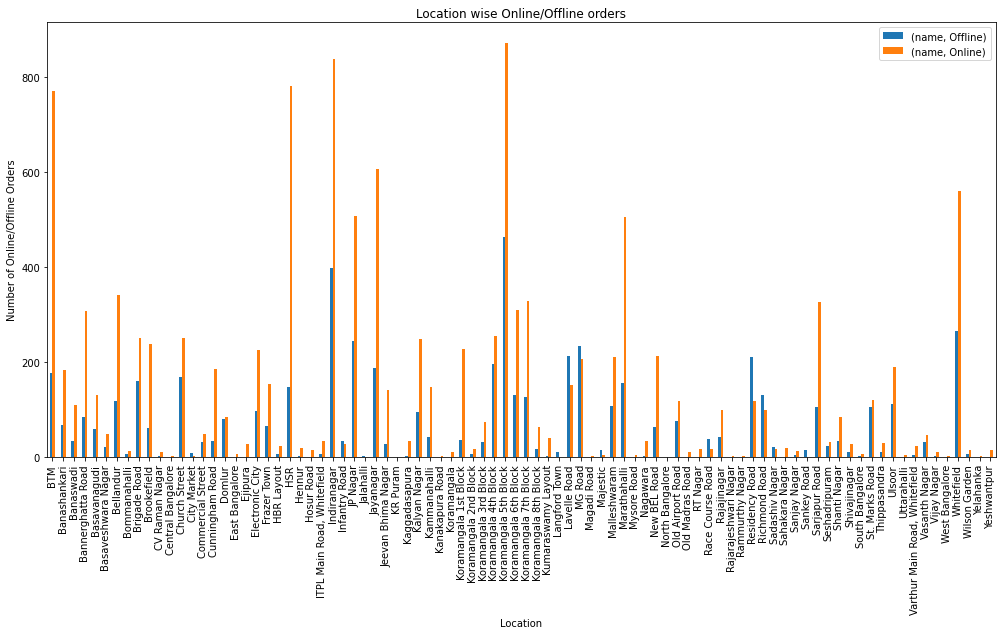

In [ ]:
df_loc_onlineord.plot(kind = 'bar', figsize = (17,8))
plt.title('Location wise Online/Offline orders')
plt.xlabel('Location')
plt.ylabel('Number of Online/Offline Orders')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Harman_Project/EDA_Plots/Location_wise_Online_or_Offline_orders.png')

In [ ]:
# types of restaurants - location wise

df_loc_resttype = pd.DataFrame(rest_data.groupby(['location','listed_in(type)'])['name'].count())
df_loc_resttype = pd.pivot_table(df_loc_resttype, index=['location'], columns=['listed_in(type)'])
df_loc_resttype

name                                                      \
listed_in(type)   Buffet Cafes Delivery Desserts Dine-out Drinks & nightlife   
location                                                                       
BTM                 13.0  22.0    541.0     42.0    314.0                9.0   
Banashankari         5.0  17.0    109.0     13.0    102.0                4.0   
Banaswadi            NaN   6.0     48.0      4.0     82.0                3.0   
Bannerghatta Road    7.0  14.0    188.0     24.0    149.0                8.0   
Basavanagudi         2.0   7.0     79.0     12.0     88.0                3.0   
...                  ...   ...      ...      ...      ...                ...   
West Bangalore       NaN   NaN      2.0      NaN      NaN                NaN   
Whitefield          21.0  28.0    360.0     41.0    318.0               31.0   
Wilson Garden        2.0   NaN      8.0      NaN      9.0                2.0   
Yelahanka            NaN   NaN      1.0      NaN      1.0                NaN   
Yeshwantpur          NaN   NaN     15.0      NaN      2.0                NaN   

                                 
listed_in(type)   Pubs and bars  
location                         
BTM                         6.0  
Banashankari                NaN  
Banaswadi                   NaN  
Bannerghatta Road           2.0  
Basavanagudi                NaN  
...                         ...  
West Bangalore              NaN  
Whitefield                 27.0  
Wilson Garden               1.0  
Yelahanka                   NaN  
Yeshwantpur                 NaN  

[88 rows x 7 columns]

Text(0.5, 1.0, 'Restaurant types')

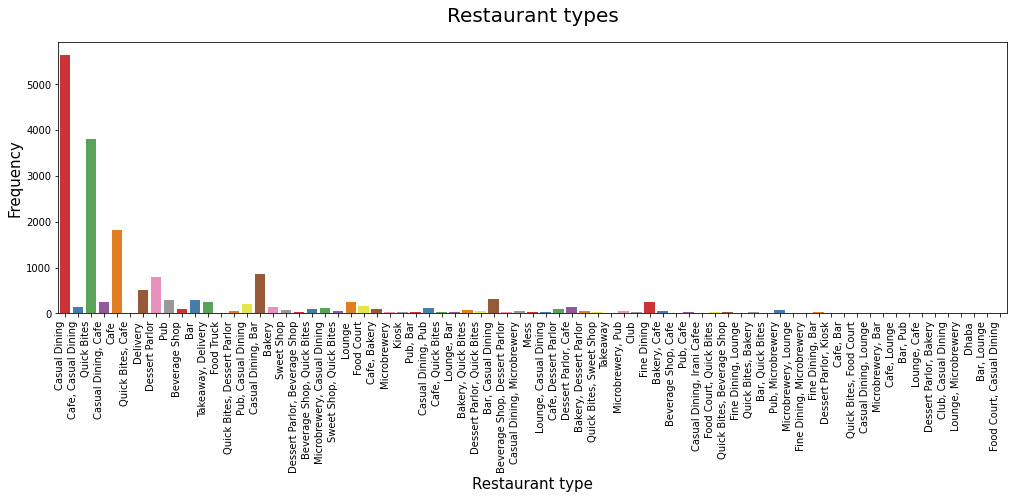

In [ ]:
# Frequency of visits according to restaurant types
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=rest_data, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

In [ ]:
# Most popular cuisines

df_cui_vot = rest_data[['cuisines', 'votes']]
df_cui_vot = df_cui_vot.groupby(['cuisines'])['votes'].sum()
df_cui_vot = df_cui_vot.to_frame()
df_cui_vot = df_cui_vot.sort_values('votes', ascending=False)
df_cui_vot

,votes
cuisines,
North Indian,424990
"Pizza, Cafe, Italian",335376
"Cafe, American, Burger, Steak",299878
"North Indian, Mughlai, South Indian, Chinese",219918
"North Indian, Chinese",166769
...,...
"Continental, Italian, North Indian, Chinese",0
"North Indian, South Indian, Chinese, Italian",0
"Continental, South Indian, Finger Food, Pizza, Seafood",0


In [ ]:
rest_data['cuisines']

0                     North Indian, Mughlai, Chinese
1                        Chinese, North Indian, Thai
2                             Cafe, Mexican, Italian
3                         South Indian, North Indian
4                           North Indian, Rajasthani
                            ...                     
51705       North Indian, Continental, Mediterranean
51707                                    Finger Food
51708             Chinese, Continental, North Indian
51711    Andhra, South Indian, Chinese, North Indian
51715                                    Finger Food
Name: cuisines, Length: 17960, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


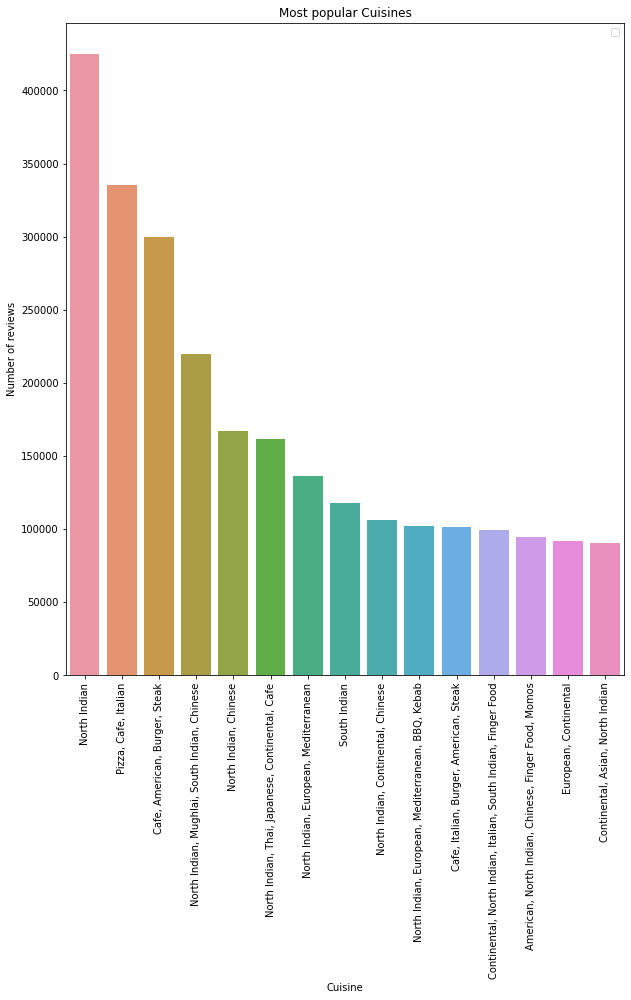

In [ ]:
df_cui_vot_top = df_cui_vot.head(15)
plt.figure(figsize = (10,12))
sns.barplot(df_cui_vot_top.index , df_cui_vot_top['votes'])
plt.xticks(rotation = 90)
plt.title('Most popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of reviews')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Harman_Project/EDA_Plots/Most_popular_cuisines.png')

In [ ]:
# segregrating cuisine column

cuisines={}
zipped=zip(rest_data['cuisines'], rest_data['votes'])

for cuisine, vote in zipped:
  current_cuisines = cuisine.split(', ')
  total_current_cuisines = len(current_cuisines)
  for cuisi in current_cuisines:
    cuisines[cuisi] = cuisines.get(cuisi, 0) + (vote//total_current_cuisines)

totalSum=0
for key in cuisines:
  totalSum+= cuisines[key]
print(rest_data['votes'].sum())
print(totalSum)

cuisines_list=list(cuisines.keys())
corresponding_votes=list(cuisines.values())
cuisines_={}
cuisines_ = {'cuisines': cuisines_list,
            'votes':corresponding_votes}

cuisines_votes=pd.DataFrame.from_dict(cuisines_)
cuisines_votes

12335336
12318262


,cuisines,votes
0,North Indian,2030203
1,Mughlai,220716
2,Chinese,977061
3,Thai,182151
4,Cafe,732598
...,...,...
93,German,2371
94,Russian,5847
95,Jewish,108
96,Vegan,108


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


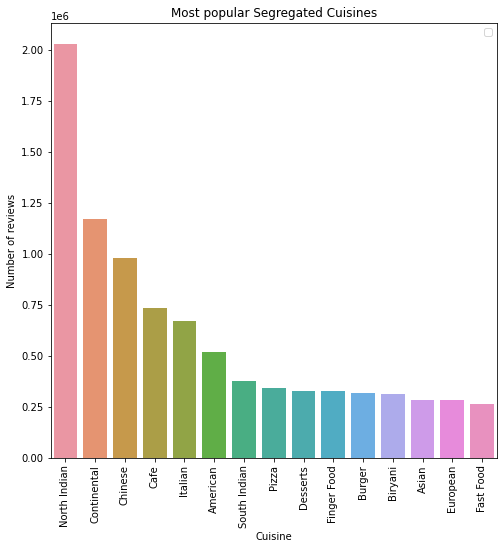

In [ ]:
df_seg_cui_vot = cuisines_votes.sort_values('votes', ascending=False)
df_seg_cui_vot_top = df_seg_cui_vot.head(15)
plt.figure(figsize = (8,8))
sns.barplot(df_seg_cui_vot_top['cuisines'] , df_seg_cui_vot_top['votes'])
plt.xticks(rotation = 90)
plt.title('Most popular Segregated Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of reviews')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Harman_Project/EDA_Plots/Most_popular_Segregated_cuisines.png')

#Recommendation system using kNN

In [ ]:
rest_data.insert(1, 'rest_id', range(1, 1 + len(rest_data)))
rest_data

,name,rest_id,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,1,Online,booking_available,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,2,Online,booking_not_available,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,3,Online,booking_not_available,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,4,Offline,booking_not_available,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,5,Offline,booking_not_available,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,17956,Online,booking_available,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,Pubs and bars
51707,M Bar - Bengaluru Marriott Hotel Whitefield,17957,Offline,booking_not_available,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,Pubs and bars
51708,Keys Cafe - Keys Hotel,17958,Offline,booking_not_available,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,Pubs and bars
51711,Bhagini,17959,Offline,booking_not_available,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,Pubs and bars


In [ ]:
rest_data.isnull().sum()

name                           0
rest_id                        0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [ ]:
''' 
lable encoding ratings column
'''

lab_enc = preprocessing.LabelEncoder()
Y = rest_data['rate']
rest_data_transformed = rest_data

Y_encoded = lab_enc.fit_transform(Y)
Y_encoded = pd.DataFrame({'rating_encoded':Y_encoded})
#rest_data_transformed['rating_encoded'] = pd.cut(x=rest_data['rate'], bins=31, labels=np.arange(31), right=False)
#rest_data_transformed = rest_data_transformed.drop(['rate'], axis = 1)
rest_data_transformed = pd.concat([rest_data_transformed, Y_encoded], axis=1)
rest_data_transformed

,name,rest_id,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),rating_encoded
0,Jalsa,1.0,Online,booking_available,4.1,775.0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,22.0
1,Spice Elephant,2.0,Online,booking_not_available,4.1,787.0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,22.0
2,San Churro Cafe,3.0,Online,booking_not_available,3.8,918.0,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,19.0
3,Addhuri Udupi Bhojana,4.0,Offline,booking_not_available,3.7,88.0,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,18.0
4,Grand Village,5.0,Offline,booking_not_available,3.8,166.0,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,17956.0,Online,booking_available,3.8,128.0,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,Pubs and bars,NaN
51707,M Bar - Bengaluru Marriott Hotel Whitefield,17957.0,Offline,booking_not_available,3.9,77.0,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,Pubs and bars,NaN
51708,Keys Cafe - Keys Hotel,17958.0,Offline,booking_not_available,2.8,161.0,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,Pubs and bars,NaN
51711,Bhagini,17959.0,Offline,booking_not_available,2.5,81.0,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,Pubs and bars,NaN


In [ ]:
rest_data_transformed.dropna(inplace = True)  # dropping null values
rest_data_transformed.isnull().sum()

name                           0
rest_id                        0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
rating_encoded                 0
dtype: int64

In [ ]:
# saving dataframe to csv file
rest_data.to_csv('/content/drive/MyDrive/Harman_Project/Dataset/new_rest_data.csv')

In [ ]:
# saving dataframe to csv file
rest_data_transformed.to_csv('/content/drive/MyDrive/Harman_Project/Dataset/rest_data_transformed.csv')

In [ ]:
#rest_data_transformed['rating_encoded'].unique()

In [ ]:
rest_data_transformed['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
len(rest_data['rate'].unique())

31

In [ ]:
#rest_data_transformed['rating_mapped'] = rest_data['rate'].map({4.1: 4.1, 3.8: 3.8, 3.7: 3.7, 4.6: 4.6, 4. :4, 4.2: 4.2, 3.9: 3.9, 3. : 3, 3.6: 3.6, 2.8: 2.8, 4.4: 4.4, 3.1: 3.1, 4.3: 4.3, 2.6: 2.6, 3.3: 3.3, 3.5: 3.5, 3.2: 3.2, 4.5: 4.5, 2.5: 2.5, 2.9: 2.9, 3.4: 3.4, 2.7: 2.7, 4.7: 4.7, 2.4: 2.4, 2.2: 2.2, 2.3: 2.3, 4.8: 4.8, 4.9: 4.9, 2.1: 2.1, 2. : 2, 1.8: 1.8})
#rest_data_transformed

In [ ]:
#, : 

# Model training 

In [ ]:
'''X = rest_data_transformed[['rest_id']]
Y = rest_data_transformed['rating_encoded']
knc = NearestNeighbors(metric = 'cosine', n_neighbors=7, algorithm='brute', n_jobs=-1)
knc.fit(X,Y)
with open('/content/drive/MyDrive/Harman_Project/Dataset/rest_reccomend_knn.pickle', 'wb') as handle:
    pickle.dump(knc, handle, protocol=pickle.HIGHEST_PROTOCOL)'''

In [ ]:
'''
 1) recommend_rating:
This function implements knn and recommends restaurants based on rating of the input retaurant
'''
def recommend_rating(inp_rest_id, num_of_reccomendation):
  X = rest_data_transformed[['rest_id']]
  Y = rest_data_transformed['rating_encoded']
  #Y_encoded = lab_enc.fit_transform(Y)

  knc = NearestNeighbors(metric = 'cosine', n_neighbors=num_of_reccomendation, algorithm='brute', n_jobs=-1)
  knc.fit(X,Y)
  neighbor_distances, knc_neigbors = knc.kneighbors([[inp_rest_id]])
  knc_neigbors = knc_neigbors[0]
  print("\n",num_of_reccomendation,"neighbors: ", knc_neigbors)
  print("\nDistance of neighbors: ", neighbor_distances[0], "\n")
  
  recommended_rest = pd.DataFrame()
  for item in knc_neigbors:
    rest_entry = rest_data_transformed.loc[rest_data_transformed['rest_id'] == item]
    recommended_rest=recommended_rest.append( [rest_entry] )
    recommended_rest = recommended_rest.sort_values('rate', ascending=False)

  return recommended_rest

In [ ]:
'''
 2) recommend_online:
This function implements knn and recommends restaurants which have online deivery option available based on rating of the input retaurant 
'''
def recommend_online(inp_rest_id, num_of_reccomendation):
  rest_online = rest_data_transformed[(rest_data_transformed['online_order'] == 'Online')]
  X = rest_online[['rest_id']]
  Y = rest_online['rating_encoded']
  #Y_encoded = lab_enc.fit_transform(Y)

  knc = KNeighborsClassifier(metric = 'cosine', n_neighbors=num_of_reccomendation, algorithm='brute', n_jobs=-1)
  knc.fit(X,Y)
  neighbor_distances, knc_neigbors = knc.kneighbors([[inp_rest_id]])
  knc_neigbors = knc_neigbors[0]
  print("\n",num_of_reccomendation,"neighbors: ", knc_neigbors)
  print("\nDistance of neighbors: ", neighbor_distances[0], "\n")
  
  recommended_rest = pd.DataFrame()
  for item in knc_neigbors:
    rest_entry = rest_online.loc[rest_online['rest_id'] == item]
    recommended_rest=recommended_rest.append( [rest_entry] )
    recommended_rest = recommended_rest.sort_values('rate', ascending=False)

  return recommended_rest

In [ ]:
'''
 3) recommend_according_to_budget:
This function implements knn and recommends restaurants based on rating of the input retaurant and filters out the restaurants that are outisde the budegt provided by the user
'''
def recommend_according_to_budget(inp_rest_id, num_of_reccomendation, upper_limit):
  rest_budget = rest_data_transformed[(rest_data_transformed['approx_cost(for two people)'] <= upper_limit)]
  X = rest_budget[['rest_id']]
  Y = rest_budget['rating_encoded']
  #Y_encoded = lab_enc.fit_transform(Y)

  knc = KNeighborsClassifier(metric = 'cosine', n_neighbors=num_of_reccomendation, algorithm='brute', n_jobs=-1)
  knc.fit(X,Y)
  neighbor_distances, knc_neigbors = knc.kneighbors([[inp_rest_id]])
  knc_neigbors = knc_neigbors[0]
  print("\n",num_of_reccomendation,"neighbors: ", knc_neigbors)
  print("\nDistance of neighbors: ", neighbor_distances[0], "\n")

  recommended_rest = pd.DataFrame()
  for item in knc_neigbors:
    rest_entry = rest_budget.loc[rest_budget['rest_id'] == item]
    recommended_rest=recommended_rest.append( [rest_entry] )
    recommended_rest = recommended_rest.sort_values('rate', ascending=False)


  return recommended_rest

In [ ]:
'''
 4) recommend_according_to_budget_and_online:
This function implements knn and recommends restaurants which have online deivery option available based on rating of the input retaurant and 
filters out the restaurants that are outisde the budegt provided by the user
'''
def recommend_according_to_budget_and_online(inp_rest_id, num_of_reccomendation, upper_limit):
  rest_online = rest_data_transformed[(rest_data_transformed['online_order'] == 'Online')]
  rest_budget = rest_online[(rest_online['approx_cost(for two people)'] <= upper_limit)]
  X = rest_budget[['rest_id']]
  Y = rest_budget['rating_encoded']

  # euclidean , cosine
  knc = NearestNeighbors(metric = 'cosine', n_neighbors=num_of_reccomendation, n_jobs=-1)
  knc.fit(X,Y)
  neighbor_distances, knc_neigbors = knc.kneighbors([[inp_rest_id]], n_neighbors=num_of_reccomendation)
  knc_neigbors = knc_neigbors[0]
  print("\n",num_of_reccomendation,"neighbors: ", knc_neigbors)
  print("\nDistance of neighbors: ", neighbor_distances[0], "\n")

  recommended_rest = pd.DataFrame()
  for item in knc_neigbors:
    rest_entry = rest_budget.loc[rest_budget['rest_id'] == item]
    recommended_rest=recommended_rest.append( [rest_entry] )
    recommended_rest = recommended_rest.sort_values('rate', ascending=False)

  return recommended_rest

In [ ]:
''' 
Taking input from the user
'''
inp_rest_id = int(input("Enter the restaurant ID: "))
num_of_reccomendation = int(input("\nEnter number of recommendations you want for the restaurants: "))
online_available = int(input("\nShould the restaurant have Onlne order facilities: \n1.Yes \n2.No\nEnter your response: "))
budget = int(input("\nFilter according to budget?: \n1.Yes \n2.Skip\nEnter your response: "))
if budget == 1:
  upper_limit = float(input("Enter the budget. Upper limit: "))

inp_rest = rest_data_transformed[(rest_data_transformed['rest_id'] == inp_rest_id)]
print("\nDetails of input restaurant: \n", inp_rest[['name', 'rest_id', 'rate', 'rating_encoded', 'location']])

if (online_available == 1) & (budget == 1):
  recommended_rest = recommend_according_to_budget_and_online(inp_rest_id, num_of_reccomendation, upper_limit)
elif (online_available != 1) & (budget == 1):
  recommended_rest = recommend_according_to_budget(inp_rest_id, num_of_reccomendation, upper_limit)
elif (online_available == 1) & (budget != 1):
  recommended_rest = recommend_online(inp_rest_id, num_of_reccomendation)
elif (online_available != 1) & (budget != 1):
  recommended_rest = recommend_rating(inp_rest_id, num_of_reccomendation)

recommended_rest[['name', 'rest_id', 'rate', 'rating_encoded', 'location', 'rest_type', 'cuisines', 'approx_cost(for two people)']]

Enter the restaurant ID: 457

Enter number of recommendations you want for the restaurants: 10

Should the restaurant have Onlne order facilities: 
1.Yes 
2.No
Enter your response: 2

Filter according to budget?: 
1.Yes 
2.Skip
Enter your response: 2

Details of input restaurant: 
      name  rest_id  rate  rating_encoded  location
1013  KFC    457.0   3.9            19.0  JP Nagar

 10 neighbors:  [4396 4397 4393 4394 4395 4391 4400 4399 4389 4398]

Distance of neighbors:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


,name,rest_id,rate,rating_encoded,location,rest_type,cuisines,approx_cost(for two people)
11022,Khawa Karpo,4396.0,4.3,28.0,Koramangala 5th Block,Quick Bites,"Chinese, Tibetan, Momos",350.0
11017,Meenu Oota Da Maane,4393.0,4.2,25.0,Koramangala 5th Block,Casual Dining,"Seafood, Mangalorean, Chinese",800.0
11013,California Burrito,4391.0,4.1,23.0,Koramangala 5th Block,Quick Bites,"Mexican, Fast Food",400.0
11027,Willys Top Cafe,4400.0,4.0,21.0,Jayanagar,Cafe,"Cafe, Continental, Asian",750.0
11018,Over The Top Terrace Lounge,4394.0,3.9,28.0,Koramangala 5th Block,Lounge,"Continental, North Indian",1400.0
11019,Bangaliana,4395.0,3.9,26.0,Koramangala 7th Block,Casual Dining,Bengali,600.0
11011,Chicken County Grand,4389.0,3.9,26.0,Bannerghatta Road,Casual Dining,"North Indian, Chinese",650.0
11023,7 Plates,4397.0,3.7,27.0,Koramangala 5th Block,Casual Dining,"Mughlai, Fast Food",750.0
11025,Biriyani Mane,4399.0,3.7,25.0,Jayanagar,Casual Dining,"Biryani, Chinese, North Indian",700.0
11024,Aalishan Restaurant & Caterer,4398.0,3.5,22.0,Koramangala 7th Block,Casual Dining,"North Indian, Mughlai",650.0


In [ ]:
'''# get input as name

name = input("Enter the name of your favorite restaurant: ")
rest_name = rest_data[(rest_data['name'] == name)]
rest_name'''

'# get input as name\n\nname = input("Enter the name of your favorite restaurant: ")\nrest_name = rest_data[(rest_data[\'name\'] == name)]\nrest_name'

In [ ]:
# print distance and all metrics - done
# save fig of EDA - done
# combine codes - done
# while printing, print restaurants according to descending order of ratings - done
# improve EDA part - done

# test and demo file - done


# Recommendation Using Scores
1. take name as input
2. filter according to rating. suppose rating of input restarant is x. give score for restaurants having rating below (x-0.3)  as 7 else 10. 
3. Similarly give scores for location and cost of two people column. Add all three scores
4. filter score in descending order. Show top 7
 
5. kmeans clustering for location


In [ ]:
'''def reccomend_score(inp_rest_id):
  rest_score_data = rest_data
  rest_score_data['rating_score'] = rest_score_data['rate'].apply(lambda x: if  rest_score_data['rate'].values[0] - inp_rest_id = )'''

"def reccomend_score(inp_rest_id):\n  rest_score_data = rest_data\n  rest_score_data['rating_score'] = rest_score_data['rate'].apply(lambda x: if  rest_score_data['rate'].values[0] - inp_rest_id = )"

In [ ]:
# 'Jalsa', 'Online', 'booking_available', 775, 'Banashankari', 'Casual Dining', 'North Indian, Mughlai, Chinese', '800.0', 'Buffet'